#  <center> Diabetes Predictor CaseStudy

### Information about dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Features:**
1. Pregnancies:-
    * Number of times pregnant
    

2. Glucose: 
   * It used to diagnose diabetes. 
   * It is calculated by oral glucose tolerance test that involves taking multiple blood samples over time, usually 2 hours.
       * Normal >> less than 140 mg/dL
       * Impaired >> 140 to 200 mg/dL
       * Abnormal >> more than 140 mg/dL
   

3. BloodPressure: 
    * Diastolic blood pressure (pressure when heart rests between two beats) (mm Hg)


4. SkinThickness: 
    * Triceps skin fold thickness (mm)
        * standard normal value is 18 mm


5. Insulin: 
    * 2-Hour serum insulin (mu U/ml)


6. BMI:
    * Body mass index (weight in kg/(height in m)^2)
       * Below 18.5 -> Underweight
       * 18.5 – 24.9 -> Normal or Healthy Weight
       * 25.0 – 29.9 -> Overweight
       * 30.0 and Above -> Obese


7. DiabetesPedigreeFunction: 
    * Diabetes pedigree function


8. Age: 
    * Age (years)


9. Outcome: 
    * Class variable (0 or 1)
        * 0 >> Negative for Diabetes
        * 1 >> Positive for Diabetes


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import countplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data
data = pd.read_csv('diabetes.csv')

### To keep it simple, We will make seperate csv files for training set and testing set

In [4]:
# split train and test set into different files

training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [5]:
training_data.shape, testing_data.shape

((614, 9), (154, 9))

In [6]:
traindf = training_data.to_csv("training_set.csv", index=False)
testdf = testing_data.to_csv("testing_set.csv", index=False)

In [7]:
# import data

train_df = pd.read_csv('training_set.csv')
test_df = pd.read_csv('testing_set.csv')

train_df.shape, test_df.shape

((614, 9), (154, 9))

## EDA  ( Exploratory Data Analysis )

In [8]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,134,74,33,60,25.9,0.460,81,0
1,4,111,72,47,207,37.1,1.390,56,1
2,8,95,72,0,0,36.8,0.485,57,0
3,5,137,108,0,0,48.8,0.227,37,1
4,2,122,76,27,200,35.9,0.483,26,0


In [9]:
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.861564,120.273616,69.039088,21.109121,83.859935,31.903909,0.470599,33.143322,0.345277
std,3.396869,30.992396,19.174695,15.731313,116.723331,8.009123,0.320892,11.975191,0.475846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.239250,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,45.000000,32.000000,0.380500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,131.500000,36.600000,0.630750,40.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.288000,81.000000,1.000000


In [10]:
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,45,543,30.5,0.158,53,1
1,5,166,72,19,175,25.8,0.587,51,1
2,7,100,0,0,0,30.0,0.484,32,1
3,3,126,88,41,235,39.3,0.704,27,0
4,7,196,90,0,0,39.8,0.451,41,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [12]:
# Check for null values
train_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data does not have any null values and all the columns are numerical.

so There is no need of label encoding and filling NaN values.

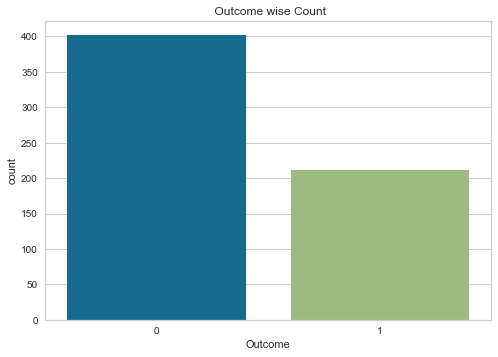

In [13]:
# Check variation in target column
countplot(data= train_df, x= "Outcome").set_title(" Outcome wise Count");
# sns.countplot(x= train_df.Outcome);

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


**Visually analyaze how each column affects target column**

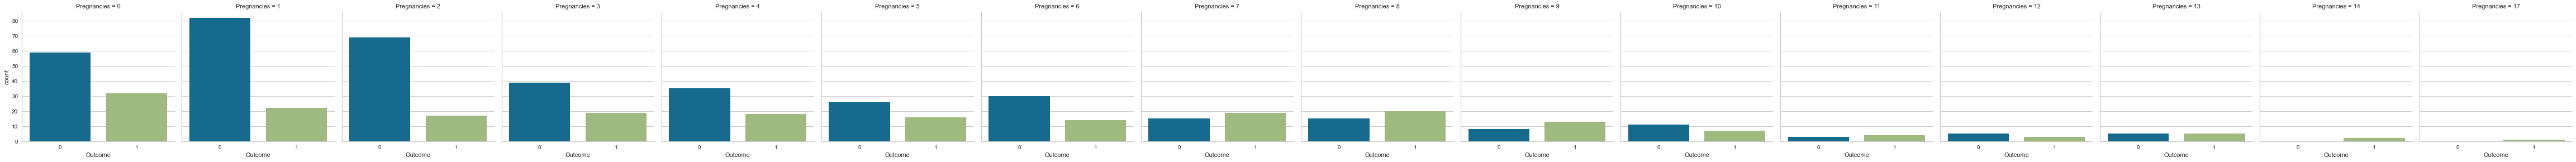

In [15]:
sns.catplot(x='Outcome', col= 'Pregnancies', kind="count", data= train_df, height=4, aspect=1);

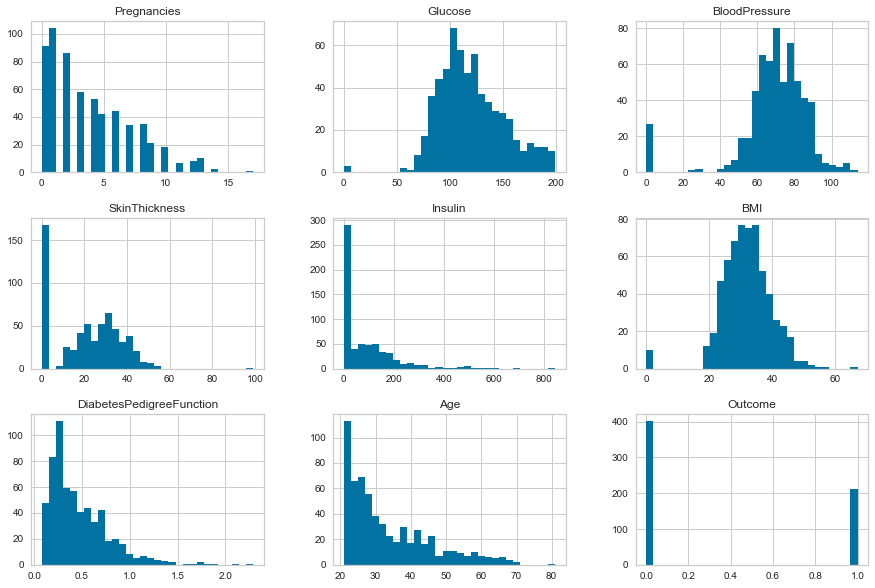

In [16]:
train_df.hist(bins=30, figsize=(15, 10));

**note** : If we have any categorical or NaN or strings, We should first use encoding methods to convert all the data into numeric form.

## Make data ready for the model

In [17]:
# Make a seperate csv for processed data
train_df.to_csv("processed_train.csv", index=False)

In [18]:
# load the new file
processed_train_df = pd.read_csv('processed_train.csv')

In [19]:
# Create Features and Labels
X = processed_train_df.drop("Outcome", axis = 1)
y = processed_train_df.Outcome

In [20]:
X.shape, y.shape

((614, 8), (614,))

In [21]:
# split the data for training and testing

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((491, 8), (123, 8), (491,), (123,))

In [23]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
291,1,96,64,27,87,33.2,0.289,21
507,0,104,64,23,116,27.8,0.454,23
328,6,137,61,0,0,24.2,0.151,55
609,6,194,78,0,0,23.5,0.129,59
69,1,92,62,25,41,19.5,0.482,25


In [24]:
# We have to check if any features are highly correlated.
def correlation(dataset, threshold):
    col_corr = set()          # set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] > threshold):        # we need absolute coeffcient value
                colname = corr_matrix.columns[i]            # column name
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.80)

In [26]:
len(corr_features)

0

We do not have any correlated features more than 80%

## Build the model

We will try 3 different Models and compare their accuracies

In [27]:
models_dict = {"random forest": RandomForestClassifier(random_state=0),
               "DT": DecisionTreeClassifier(random_state=0),
               "KNN": KNeighborsClassifier()}

In [28]:
def get_model_scores(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    # make dict to collect model scores
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [29]:
model_scores = get_model_scores(models_dict, X_train, X_val, y_train, y_val)
model_scores

{'random forest': 0.8048780487804879,
 'DT': 0.7235772357723578,
 'KNN': 0.7804878048780488}

In [30]:
model_scores = pd.DataFrame(model_scores, index=["accuracy"])
model_scores

,random forest,DT,KNN
accuracy,0.804878,0.723577,0.780488


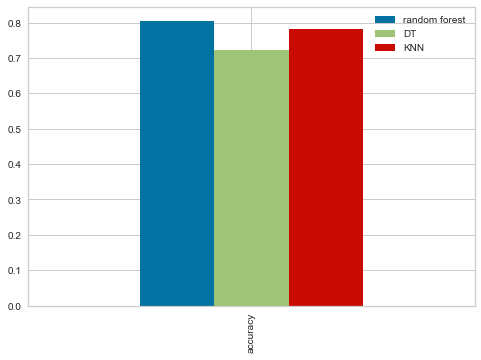

In [31]:
model_scores.plot.bar();

As per results, Random Forest gives highest accuracy. therefore we will do hyperparameter tuning on Random Forest.

**Random Forest Hypertunning**

In [32]:
# get Hyperparameters
clf = RandomForestClassifier(random_state=0)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [33]:
# make grid for hyperparameter tuning using RandomizedCV
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
%%time
rf_clf = RandomizedSearchCV(clf,
                            param_distributions= rf_grid,
                            cv = 5,
                            n_iter = 100)

rf_clf.fit(X_train, y_train)

Wall time: 5min 52s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [35]:
rf_clf.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

**Note:** We got the best parameters for Random Forest Model after Hyperparameter tuning

## Validate and Evaluate the model

In [36]:
best_model = RandomForestClassifier(n_estimators= 160,
                                    min_samples_split= 8,
                                    min_samples_leaf= 19,
                                    max_depth= None,
                                    random_state=42)
best_model.fit(X_train, y_train)
y_preds = best_model.predict(X_val)

In [37]:
accuracy = accuracy_score(y_val, y_preds)
print(f"Accuracy of Random Forest Classifier is {accuracy}")

Accuracy of Random Forest Classifier is 0.8130081300813008


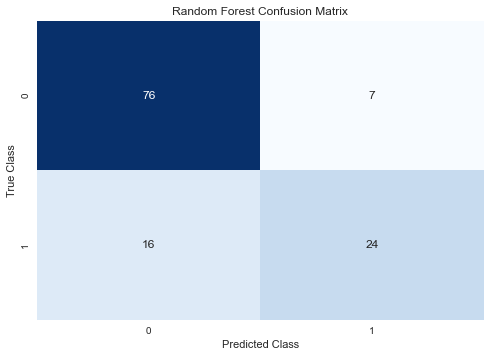

In [38]:
cnf_matrix = confusion_matrix(y_val, y_preds)

# visualization of confusion matrix
s = sns.heatmap(cnf_matrix, annot=True, cbar=False, cmap="Blues")
s.set(title = "Random Forest Confusion Matrix",
      xlabel= "Predicted Class",
      ylabel= "True Class");


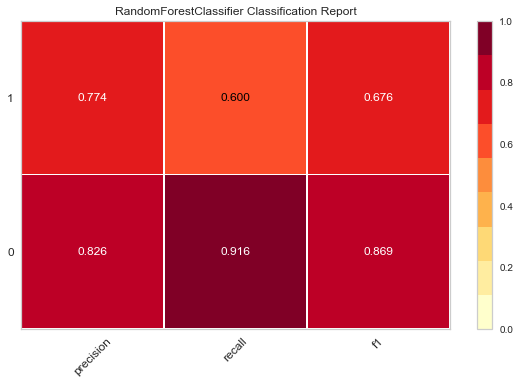

In [39]:
classification_report(best_model, X_train, y_train, X_val, y_val);

## Test the model on testing set

In [40]:
test_df = pd.read_csv('testing_set.csv')
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,45,543,30.5,0.158,53,1
1,5,166,72,19,175,25.8,0.587,51,1
2,7,100,0,0,0,30.0,0.484,32,1
3,3,126,88,41,235,39.3,0.704,27,0
4,7,196,90,0,0,39.8,0.451,41,1


In [41]:
X = test_df.drop('Outcome', axis=1)
y = test_df.Outcome

X.shape, y.shape

((154, 8), (154,))

In [42]:
y_preds = best_model.predict(X)

In [43]:
accuracy = accuracy_score(y, y_preds)
accuracy

0.7597402597402597

In [44]:
def plot_feature_importances(model, dataset):
    plt.figure(figsize=(8,6))
    n_features = len(dataset.columns[:-1])
    plt.barh(range(n_features), model.feature_importances_, align='center')
    dataset_features = [x for i, x in enumerate(dataset.columns) if i != n_features]
    plt.yticks(np.arange(n_features), dataset_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

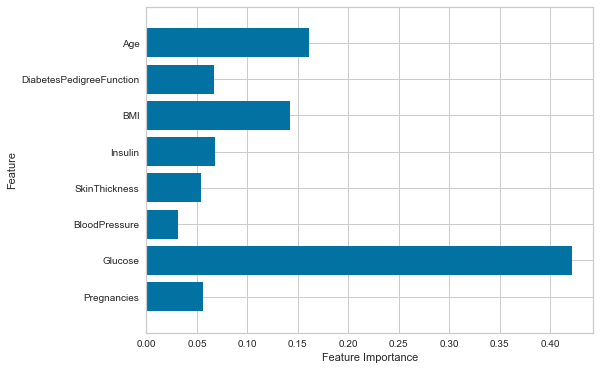

In [45]:
plot_feature_importances(best_model, processed_train_df)